In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/programagiovanni-code/trilhas_SCTEC/refs/heads/main/dados/titanic.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#CONHECENDO MELHOR O GRÁFICO
#---- Quantidade de valores de cada variavel
#df['PassengerId'].value_counts()
#df['Name'].value_counts()

#----
df['Pclass'].value_counts()    #- Classe do bilhete
#df['Cabin'].value_counts()     #- Letra + Numero
#df['Embarked'].value_counts()  #- Cidade de embarque
#df['Age'].value_counts()       #- Idade
#df['SibSp'].value_counts()     #- Irmãos/Conjuges
#df['Parch'].value_counts()     #- Pais e filhos
#df['Fare'].value_counts()      #- Tarifa

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [7]:
# Sistematica de cabines do Titanic usando a primeira letra
df['Deck'] = df['Cabin'].str[0].fillna('U')
def group_deck(deck):
    if deck in ['A', 'B', 'C', 'D', 'E']:
        return 'A-E'
    elif deck in ['F', 'G']:
        return 'F-G'
    else:
        return deck

df['Deck_Grouped'] = df['Deck'].apply(group_deck)

In [9]:
print("Contagem de valores agrupados para 'Deck':")
df['Deck_Grouped'].value_counts()

Contagem de valores agrupados para 'Deck':


,count
Deck_Grouped,
U,687
A-E,186
F-G,17
T,1


In [8]:
#Limpeza de dados
print('Filtrando os dados')

df['Age'] = df['Age'].fillna(df['Age'].median())
print('Substituindo dados faltantes na idade pela mediana')

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print('Substituindo dados faltantes nos embarcados por zero')

df = df.drop(columns=['Cabin'])
print('Eliminando coluna Cabine por ter muitos dados faltantes')

initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
removed_rows = initial_rows - df.shape[0]
print(f"Foram removidas {removed_rows} linhas duplicadas.")
print('Os dados foram tratados')

Filtrando os dados
Substituindo dados faltantes na idade pela mediana
Substituindo dados faltantes nos embarcados por zero
Eliminando coluna Cabine por ter muitos dados faltantes
Foram removidas 0 linhas duplicadas.
Os dados foram tratados


In [9]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Deck            0
Deck_Grouped    0
dtype: int64

In [10]:
#Visualização da tabela descritiva e valores estátisticos
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.36,0.52,0.38,32.20
std,257.35,0.49,0.84,13.02,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,22.00,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,35.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [12]:
# Visualização da tabela adaptada
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Deck_Grouped
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,U,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,A-E
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,U,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C,A-E
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,U,U


In [13]:
sns.set_theme(style="whitegrid")

Grafico e tabela 1: Relação de Grupos de tarifa


FareGroup
0-17      496
18-50     234
51-250    152
>250        9
Name: count, dtype: int64

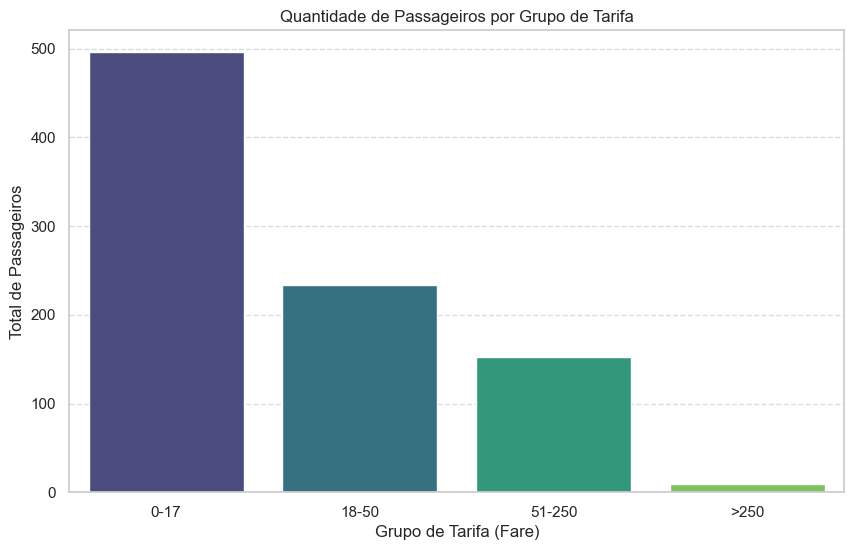

In [14]:
# Grafico e tabela 1: Relação de Grupos de tarifa

#Tabela
bins = [0, 17, 50, 250, df['Fare'].max() + 1]
labels = ['0-17', '18-50', '51-250', '>250']
df['FareGroup'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=False)
fare_group_counts = df['FareGroup'].value_counts().sort_index()
print("Grafico e tabela 1: Relação de Grupos de tarifa")
display(fare_group_counts)

# Gráficos
plt.figure(figsize=(10, 6))
sns.barplot(x=fare_group_counts.index, y=fare_group_counts.values, hue=fare_group_counts.index, palette='viridis', legend=False)
plt.title('Quantidade de Passageiros por Grupo de Tarifa')
plt.xlabel('Grupo de Tarifa (Fare)')
plt.ylabel('Total de Passageiros')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Gráfico e Tabela 2: Relação entre Grupo de Tarifa e Classe


Pclass,1ª Classe,2ª Classe,3ª Classe,Total
FareGroup,,,,
0-17,6,99,391,496
18-50,70,78,86,234
51-250,131,7,14,152
>250,9,0,0,9


<Figure size 1000x600 with 0 Axes>

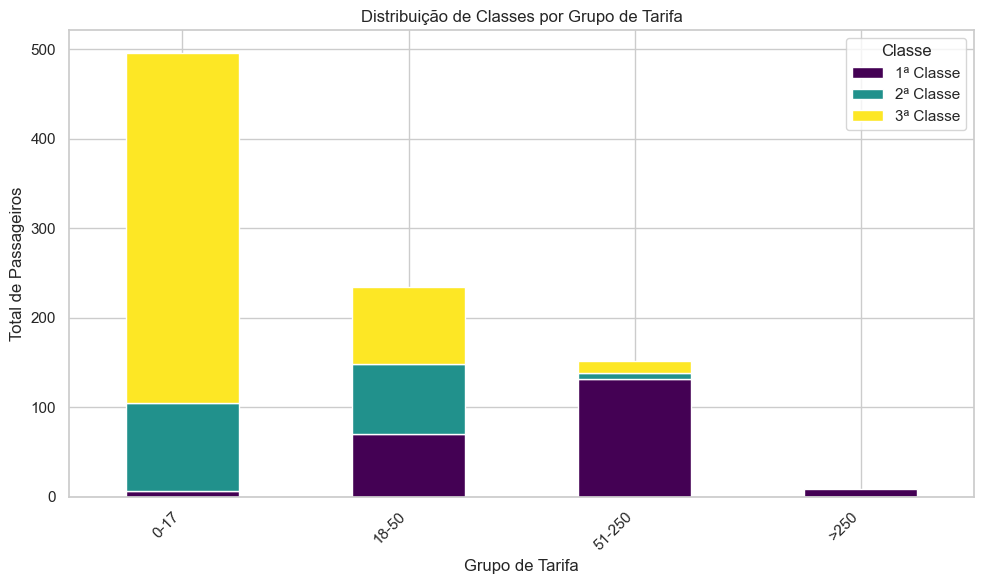

In [15]:
# Gráfico e Tabela 2: Relação entre Grupo de Tarifa e Classe

# Tabela
fare_class_counts = df.groupby(['FareGroup', 'Pclass'], observed=False).size().unstack(fill_value=0)
fare_class_counts = fare_class_counts.rename(columns={1: '1ª Classe', 2: '2ª Classe', 3: '3ª Classe'})
fare_class_counts['Total'] = fare_class_counts['1ª Classe'] + fare_class_counts['2ª Classe'] + fare_class_counts['3ª Classe']

print("Gráfico e Tabela 2: Relação entre Grupo de Tarifa e Classe")
display(fare_class_counts)

# Gráfico
plt.figure(figsize=(10, 6))
fare_class_counts[['1ª Classe', '2ª Classe', '3ª Classe']].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribuição de Classes por Grupo de Tarifa')
plt.xlabel('Grupo de Tarifa')
plt.ylabel('Total de Passageiros')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe')
plt.tight_layout()
plt.show()

Gráfico e Tabela 3: Relação entre Grupo de Tarifa e Grupo de Convés


Deck_Grouped,A-E,F-G,T,U,Total
FareGroup,,,,,
0-17,15,11,0,470,496
18-50,49,6,1,178,234
51-250,114,0,0,38,152
>250,8,0,0,1,9


<Figure size 1000x600 with 0 Axes>

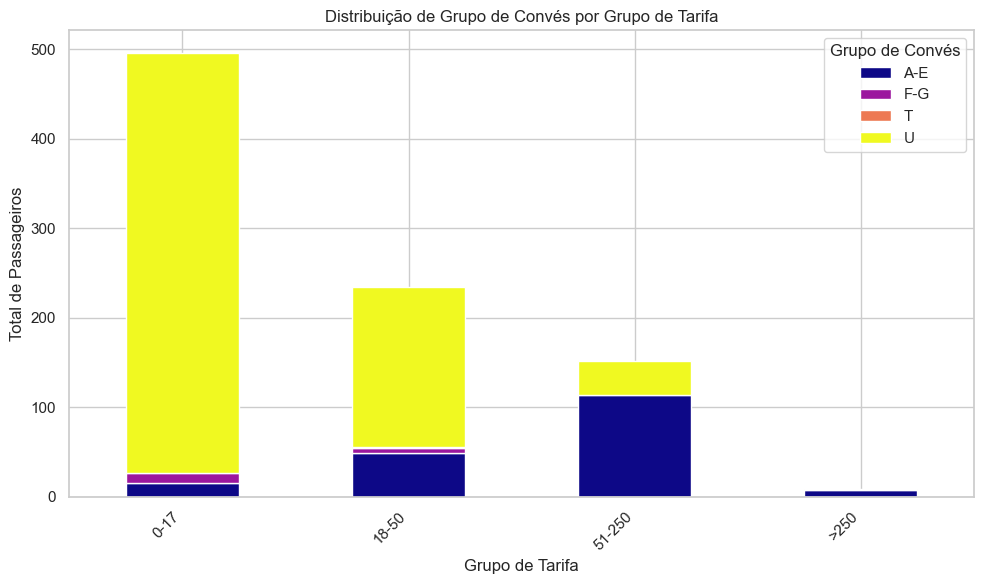

In [16]:
# Gráfico e Tabela 3: Relação entre Grupo de Tarifa e Grupo de Convés

# Tabela para a relação FareGroup e Deck_Grouped
fare_deck_counts = df.groupby(['FareGroup', 'Deck_Grouped'], observed=False).size().unstack(fill_value=0)
fare_deck_counts['Total'] = fare_deck_counts.sum(axis=1)

print("Gráfico e Tabela 3: Relação entre Grupo de Tarifa e Grupo de Convés")
display(fare_deck_counts)

# Gráfico de barras empilhadas para visualizar a relação
plt.figure(figsize=(10, 6))
fare_deck_counts.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')
plt.title('Distribuição de Grupo de Convés por Grupo de Tarifa')
plt.xlabel('Grupo de Tarifa')
plt.ylabel('Total de Passageiros')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Grupo de Convés')
plt.tight_layout()
plt.show()

--- Quantidade de Passageiros por Grupo de Convés e Classe ---


Pclass,1ª Classe,2ª Classe,3ª Classe,Total
Deck_Grouped,,,,
A-E,175,8,3,186
F-G,0,8,9,17
T,1,0,0,1
U,40,168,479,687


<Figure size 1000x600 with 0 Axes>

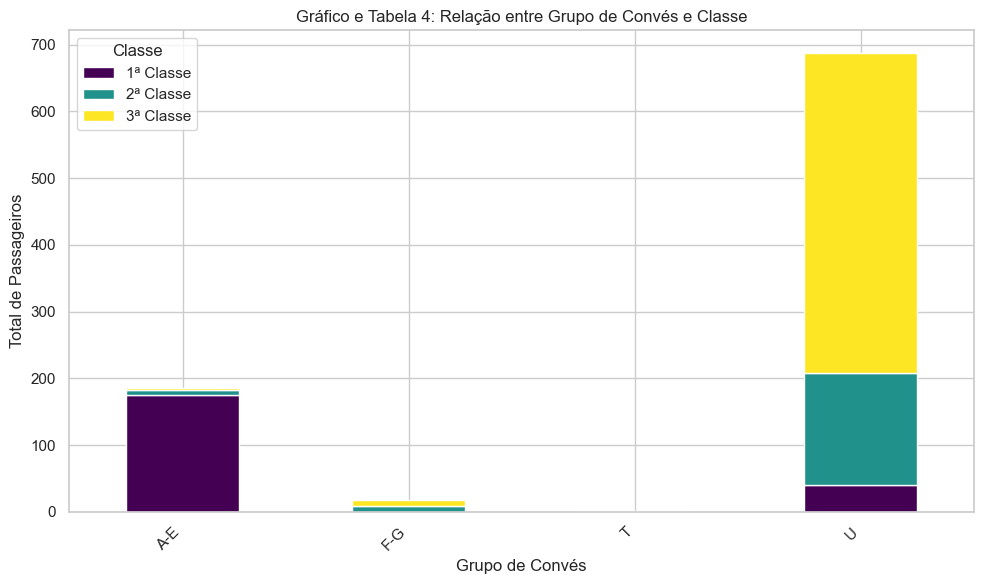

In [17]:
# Gráfico e Tabela 4: Relação entre Grupo de Convés e Classe

# Tabela para a relação Deck_Grouped e Pclass
deck_class_counts = df.groupby(['Deck_Grouped', 'Pclass'], observed=False).size().unstack(fill_value=0)
deck_class_counts = deck_class_counts.rename(columns={1: '1ª Classe', 2: '2ª Classe', 3: '3ª Classe'})
deck_class_counts['Total'] = deck_class_counts['1ª Classe'] + deck_class_counts['2ª Classe'] + deck_class_counts['3ª Classe']

print("--- Quantidade de Passageiros por Grupo de Convés e Classe ---")
display(deck_class_counts)

# Gráfico de barras empilhadas para visualizar a relação
plt.figure(figsize=(10, 6))
deck_class_counts[['1ª Classe', '2ª Classe', '3ª Classe']].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Gráfico e Tabela 4: Relação entre Grupo de Convés e Classe')
plt.xlabel('Grupo de Convés')
plt.ylabel('Total de Passageiros')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe')
plt.tight_layout()
plt.show()

Gráfico e Tabela 5: Relação entre Grupo de Convés e Sobrevivência


Survived,Não Sobrevivente,Sobrevivente,Total,% Sobrevivente
Deck_Grouped,,,,
A-E,60,126,186,67.74
F-G,7,10,17,58.82
T,1,0,1,0.00
U,481,206,687,29.99


<Figure size 1000x600 with 0 Axes>

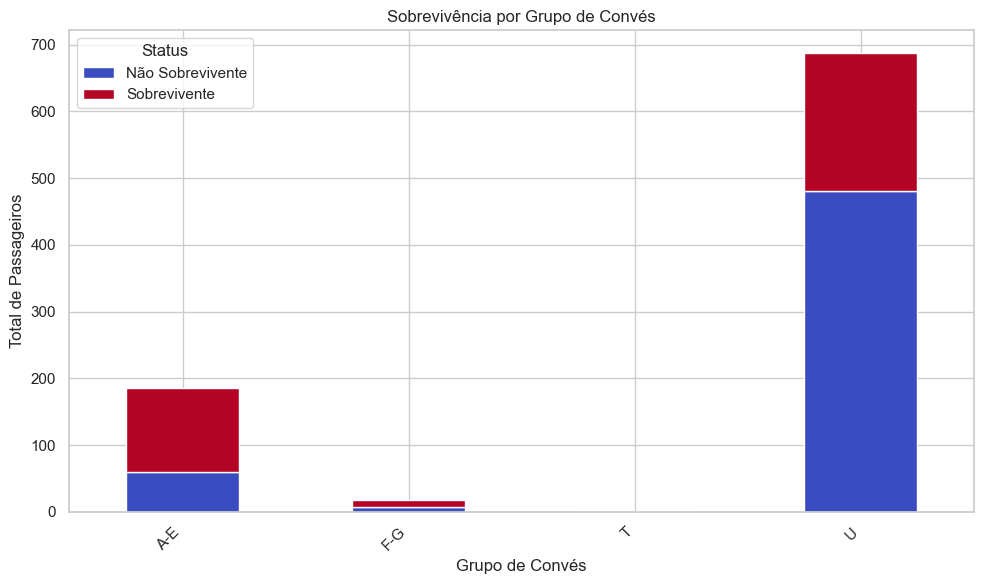

In [18]:
# Gráfico e Tabela 5: Relação entre Grupo de Convés e Sobrevivência

# Tabela
deck_survival_counts = df.groupby(['Deck_Grouped', 'Survived'], observed=False).size().unstack(fill_value=0)
deck_survival_counts = deck_survival_counts.rename(columns={0: 'Não Sobrevivente', 1: 'Sobrevivente'})
deck_survival_counts['Total'] = deck_survival_counts['Não Sobrevivente'] + deck_survival_counts['Sobrevivente']
deck_survival_counts['% Sobrevivente'] = (deck_survival_counts['Sobrevivente'] / deck_survival_counts['Total'] * 100).round(2)

print("Gráfico e Tabela 5: Relação entre Grupo de Convés e Sobrevivência")
display(deck_survival_counts)

# Gráfico
plt.figure(figsize=(10, 6))
deck_survival_counts[['Não Sobrevivente', 'Sobrevivente']].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Sobrevivência por Grupo de Convés')
plt.xlabel('Grupo de Convés')
plt.ylabel('Total de Passageiros')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

Gráfico e Tabela 6: Relação de sobrevivencia entre Tarifa baixa (>17) e estar na 1ª Classe ou convés A-E


,Count,Percentage
Survived,,
Não Sobrevivente,8,47.058824
Sobrevivente,9,52.941176


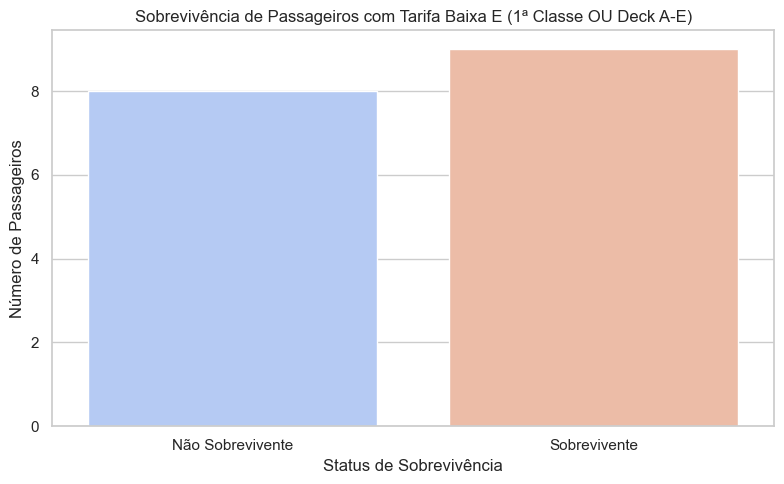

In [19]:
# Gráfico e Tabela 6: Relação de sobrevivencia entre Tarifa baixa (>17) e estar na 1ª Classe ou convés A-E
# Tabela
# Tabela
condition = (
    (df['FareGroup'] == '0-17') &
    ((df['Pclass'] == 1) | (df['Deck_Grouped'] == 'A-E'))
)
filtered_df = df[condition]
survival_counts = filtered_df['Survived'].value_counts().sort_index()
survival_percentages = (filtered_df['Survived'].value_counts(normalize=True) * 100).sort_index()
survival_summary = pd.DataFrame({
    'Count': survival_counts,
    'Percentage': survival_percentages
})
survival_summary.index = survival_summary.index.map({0: 'Não Sobrevivente', 1: 'Sobrevivente'})

print('Gráfico e Tabela 6: Relação de sobrevivencia entre Tarifa baixa (>17) e estar na 1ª Classe ou convés A-E')
display(survival_summary)

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_summary.index, y=survival_summary['Count'], hue=survival_summary.index, palette='coolwarm', legend=False)
plt.title('Sobrevivência de Passageiros com Tarifa Baixa E (1ª Classe OU Deck A-E)')
plt.xlabel('Status de Sobrevivência')
plt.ylabel('Número de Passageiros')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Gráfico e Tabela 7: Relação de sobrevivencia entre Tarifa Alta e não estar na 1ª Classe ou convés A-E


,Count,Percentage
Survived,,
Não Sobrevivente,19,48.717949
Sobrevivente,20,51.282051


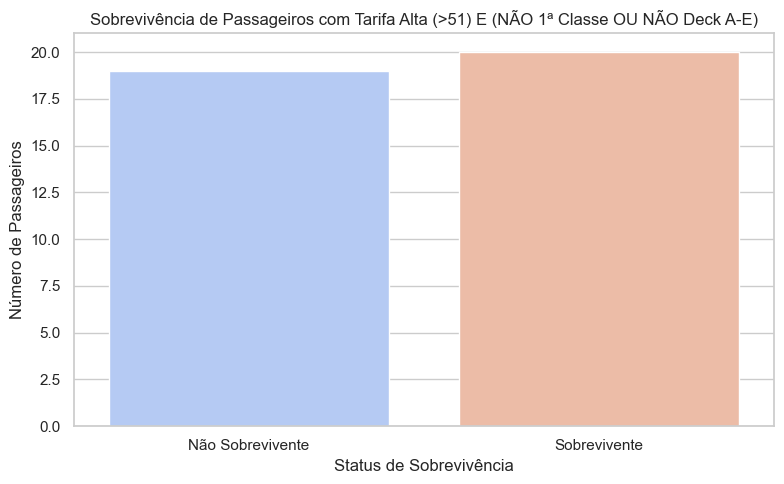

In [20]:
# Gráfico e Tabela 7: Relação de sobrevivencia entre Tarifa Alta e não estar na 1ª Classe ou convés A-E

# Tabela
condition = (
    (df['FareGroup'].isin(['51-250', '>250'])) &
    ((df['Pclass'] != 1) | (df['Deck_Grouped'] != 'A-E'))
)
filtered_df_high_fare = df[condition]
survival_counts_high_fare = filtered_df_high_fare['Survived'].value_counts().sort_index()
survival_percentages_high_fare = (filtered_df_high_fare['Survived'].value_counts(normalize=True) * 100).sort_index()
survival_summary_high_fare = pd.DataFrame({
    'Count': survival_counts_high_fare,
    'Percentage': survival_percentages_high_fare
})
survival_summary_high_fare.index = survival_summary_high_fare.index.map({0: 'Não Sobrevivente', 1: 'Sobrevivente'})

print("Gráfico e Tabela 7: Relação de sobrevivencia entre Tarifa Alta e não estar na 1ª Classe ou convés A-E")
display(survival_summary_high_fare)

# Gerando
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_summary_high_fare.index, y=survival_summary_high_fare['Count'], hue=survival_summary_high_fare.index, palette='coolwarm',legend=False)
plt.title('Sobrevivência de Passageiros com Tarifa Alta (>51) E (NÃO 1ª Classe OU NÃO Deck A-E)')
plt.xlabel('Status de Sobrevivência')
plt.ylabel('Número de Passageiros')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Gráfico e Tabela 8: Relação entre Grupo de Tarifa e Sobrevivência


Survived,Não Sobrevivente,Sobrevivente,Total,% Sobrevivente
FareGroup,,,,
0-17,364,132,496,26.61
18-50,133,101,234,43.16
51-250,50,102,152,67.11
>250,2,7,9,77.78


<Figure size 1000x600 with 0 Axes>

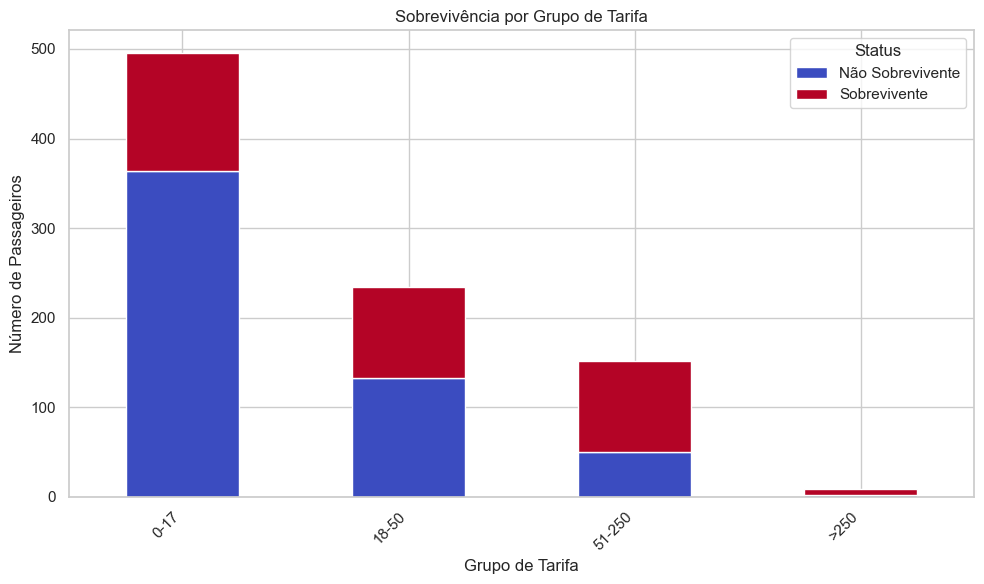

In [21]:
# Gráfico e Tabela 8: Relação entre Grupo de Tarifa e Sobrevivência

# Tabela
fare_survival_counts = df.groupby(['FareGroup', 'Survived'], observed=False).size().unstack(fill_value=0)
fare_survival_counts = fare_survival_counts.rename(columns={0: 'Não Sobrevivente', 1: 'Sobrevivente'})
fare_survival_counts['Total'] = fare_survival_counts['Não Sobrevivente'] + fare_survival_counts['Sobrevivente']
fare_survival_counts['% Sobrevivente'] = (fare_survival_counts['Sobrevivente'] / fare_survival_counts['Total'] * 100).round(2)

print("Gráfico e Tabela 8: Relação entre Grupo de Tarifa e Sobrevivência")
display(fare_survival_counts)

# Gráfico
plt.figure(figsize=(10, 6))
fare_survival_counts[['Não Sobrevivente', 'Sobrevivente']].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Sobrevivência por Grupo de Tarifa')
plt.xlabel('Grupo de Tarifa')
plt.ylabel('Número de Passageiros')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

Gráfico e Tabela 10: Total sobreviventes
Survived
Não sobrevivente (%)    61.616162
Sobrevivente(%)         38.383838
Name: proportion, dtype: float64


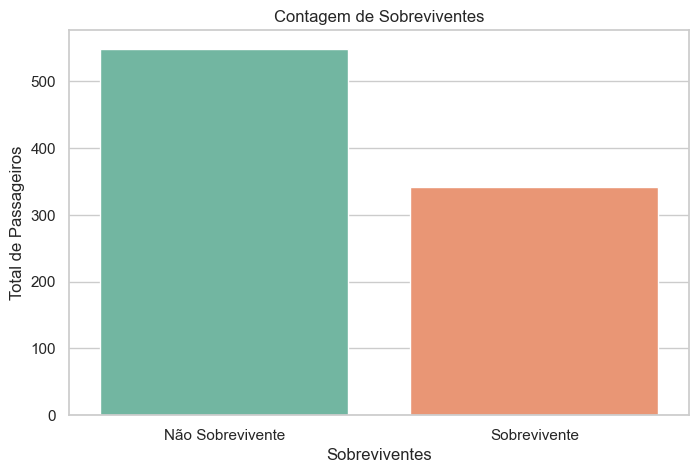

In [22]:
# Gráfico e Tabela 10: Total sobreviventes

# Tabela
survival_percentages = df['Survived'].value_counts(normalize=True) * 100
survival_percentages_renamed = survival_percentages.rename(index={0: 'Não sobrevivente (%)', 1: 'Sobrevivente(%)'})
print("Gráfico e Tabela 10: Total sobreviventes")
print(survival_percentages_renamed)

# Grafico
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Survived', hue='Survived', palette='Set2', legend=False)
plt.title('Contagem de Sobreviventes')
plt.xlabel('Sobreviventes')
plt.ylabel('Total de Passageiros')
plt.xticks([0, 1], ['Não Sobrevivente', 'Sobrevivente'])
plt.show()

Gráfico e Tabela 11: Total em relação ao Sexo
Sex
Masculino (%)    64.758698
Feminino (%)     35.241302
Name: proportion, dtype: float64


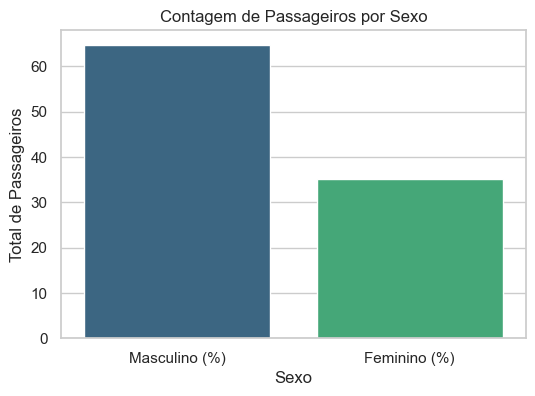

In [23]:
# Gráfico e Tabela 11: Total em relação ao Sexo

# Tabela
sex_percentages = df['Sex'].value_counts(normalize=True) * 100
sex_percentages_renamed = sex_percentages.rename(index={'male': 'Masculino (%)', 'female': 'Feminino (%)'})
print("Gráfico e Tabela 11: Total em relação ao Sexo")
print(sex_percentages_renamed)

# Grafico
plt.figure(figsize=(6, 4))
sns.barplot(x=sex_percentages_renamed.index, y=sex_percentages_renamed.values, hue=sex_percentages_renamed.index, palette='viridis', legend=False)
plt.title('Contagem de Passageiros por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Total de Passageiros')
plt.show()

Gráfico e Tabela 12: Sobrevivência por Sexo
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


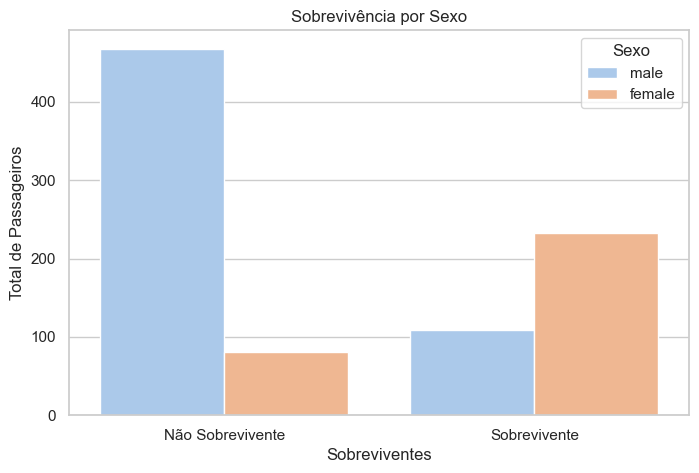

In [24]:
# Gráfico e Tabela 12: Sobrevivência por Sexo

# Tabela
taxa_sobrevivencia_sexo = df.groupby('Sex')['Survived'].mean() * 100
print('Gráfico e Tabela 12: Sobrevivência por Sexo')
print(taxa_sobrevivencia_sexo)

# Grafico
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Survived', hue='Sex', palette='pastel')
plt.title('Sobrevivência por Sexo')
plt.xlabel('Sobreviventes')
plt.ylabel('Total de Passageiros')
plt.xticks([0, 1], ['Não Sobrevivente', 'Sobrevivente'])
plt.legend(title='Sexo')
plt.show()

Gráfico e Tabela 14: Relação Sexo e Classe
Sex        Mulheres  Homens  Total
Pclass                            
1ª Classe        94     122    216
2ª Classe        76     108    184
3ª Classe       144     347    491


<Figure size 1200x600 with 0 Axes>

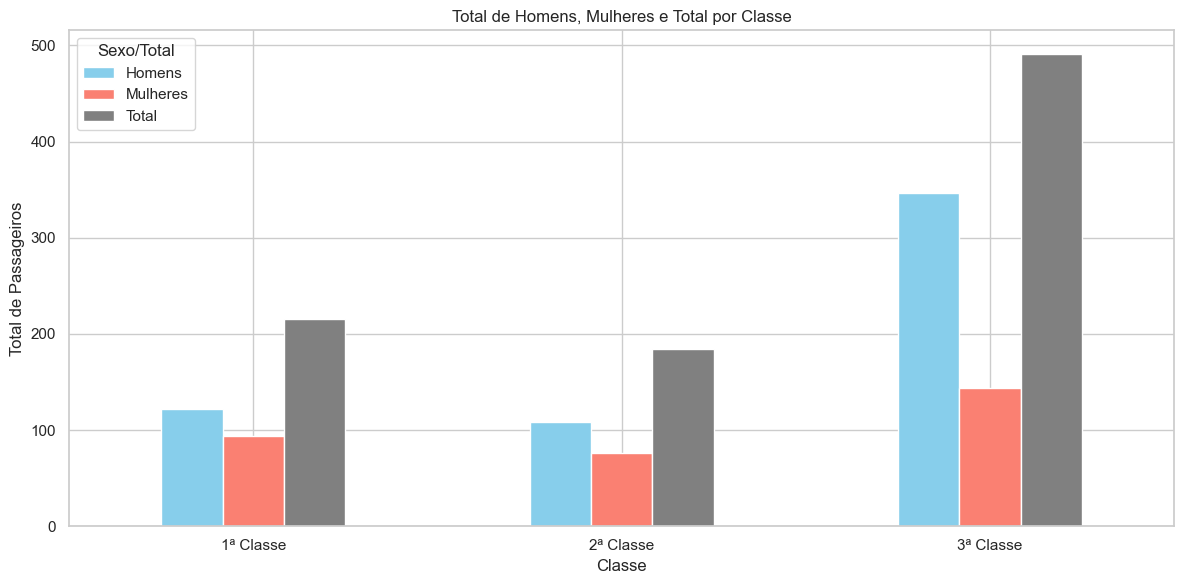

In [25]:
# Gráfico e Tabela 14: Relação Sexo e Classe

# Tabela
gender_by_class = df.groupby(['Pclass', 'Sex']).size().unstack(fill_value=0)
gender_by_class = gender_by_class.rename(index={1: '1ª Classe', 2: '2ª Classe', 3: '3ª Classe'})
gender_by_class = gender_by_class.rename(columns={'male': 'Homens', 'female': 'Mulheres'})
gender_by_class['Total'] = gender_by_class['Homens'] + gender_by_class['Mulheres']
print('Gráfico e Tabela 14: Relação Sexo e Classe')
print(gender_by_class)

# Grafico
plt.figure(figsize=(12, 6))
gender_by_class[['Homens', 'Mulheres', 'Total']].plot(kind='bar', stacked=False, figsize=(12, 6), color=['skyblue', 'salmon', 'grey'])
plt.title('Total de Homens, Mulheres e Total por Classe')
plt.xlabel('Classe')
plt.ylabel('Total de Passageiros')
plt.xticks(rotation=0)
plt.legend(title='Sexo/Total')
plt.tight_layout()
plt.show()

Gráfico e Tabela 15: Relação Faixa Etária e Sexo
Sex                     Mulheres  Homens  Total
AgeGroup                                       
Bebês (0-4)                   12      18     30
Crianças (5-12)               20      18     38
Adolescentes (13-18)          23      22     45
Jovens Adultos (19-30)       145     303    448
Adultos (31-60)              110     194    304
Idosos (>60)                   4      21     25


<Figure size 1200x700 with 0 Axes>

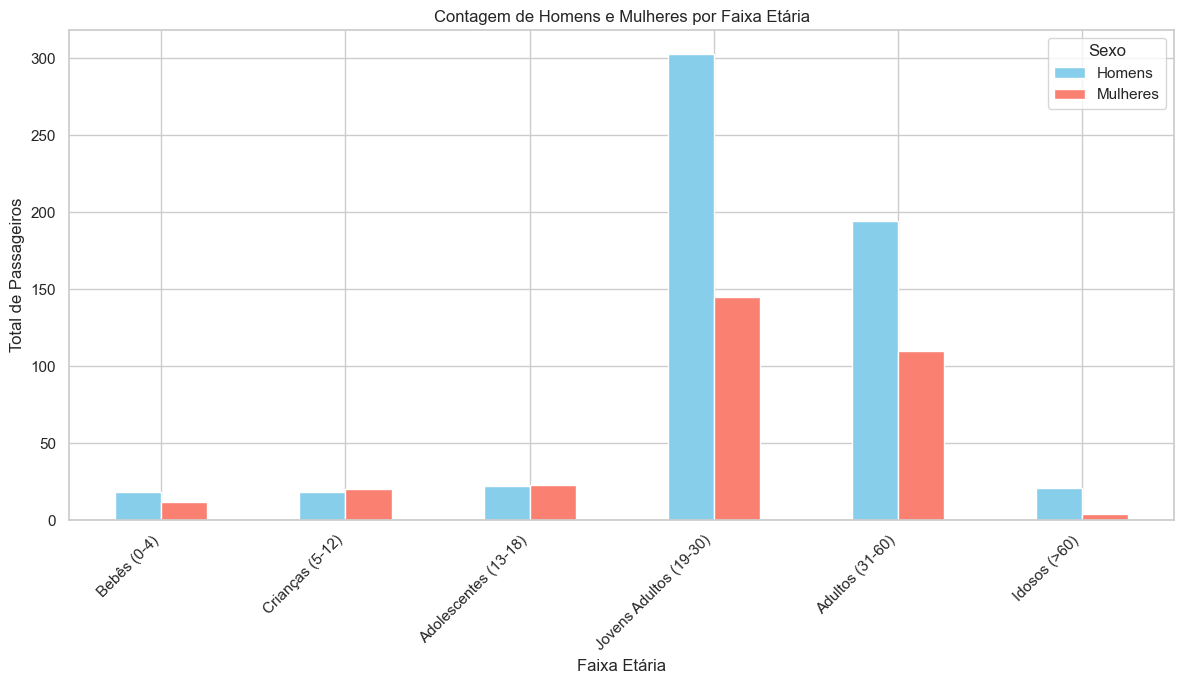

In [27]:
# Gráfico e Tabela 15: Relação Faixa Etária e Sexo

# Tabela
bins = [0, 4, 12, 18, 30, 60, df['Age'].max()]
labels = ['Bebês (0-4)', 'Crianças (5-12)', 'Adolescentes (13-18)', 'Jovens Adultos (19-30)', 'Adultos (31-60)', 'Idosos (>60)']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
gender_by_age_group = df.groupby(['AgeGroup', 'Sex'], observed=False).size().unstack(fill_value=0)
gender_by_age_group = gender_by_age_group.rename(columns={'male': 'Homens', 'female': 'Mulheres'})
gender_by_age_group['Total'] = gender_by_age_group['Homens'] + gender_by_age_group['Mulheres']
print("Gráfico e Tabela 15: Relação Faixa Etária e Sexo")
print(gender_by_age_group)

# Grafico
plt.figure(figsize=(12, 7))
gender_by_age_group[['Homens', 'Mulheres']].plot(kind='bar', stacked=False, figsize=(12, 7), color=['skyblue', 'salmon'])
plt.title('Contagem de Homens e Mulheres por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Total de Passageiros')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

Gráfico e Tabela 16: Sobrevivência por Idade e Tabela Detalhada


Survived                         Não Sobrevivente  Sobrevivente  Total  \
AgeGroup               Sex                                               
Bebês (0-4)            Mulheres                 5             7     12   
                       Homens                   5            13     18   
Crianças (5-12)        Mulheres                 8            12     20   
                       Homens                  11             7     18   
Adolescentes (13-18)   Mulheres                 4            19     23   
                       Homens                  19             3     22   
Jovens Adultos (19-30) Mulheres                42           103    145   
                       Homens                 259            44    303   
Adultos (31-60)        Mulheres                22            88    110   
                       Homens                 155            39    194   
Idosos (>60)           Mulheres                 0             4      4   
                       Homens                  19             2     21   

Survived                        % Sobreviventes Total Faixa Etária  
AgeGroup               Sex                                          
Bebês (0-4)            Mulheres                          66.666667  
                       Homens                            66.666667  
Crianças (5-12)        Mulheres                          50.000000  
                       Homens                            50.000000  
Adolescentes (13-18)   Mulheres                          48.888889  
                       Homens                            48.888889  
Jovens Adultos (19-30) Mulheres                          32.812500  
                       Homens                            32.812500  
Adultos (31-60)        Mulheres                          41.776316  
                       Homens                            41.776316  
Idosos (>60)           Mulheres                          24.000000  
                       Homens                            24.000000

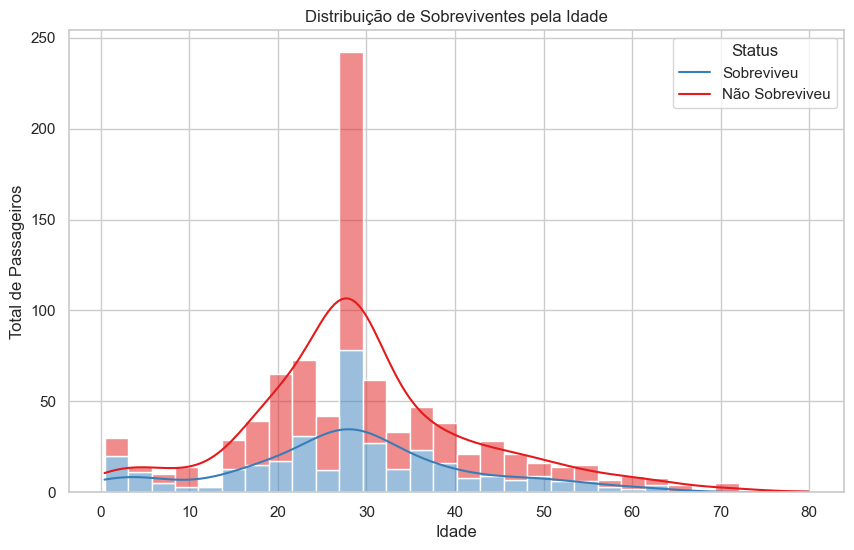

In [28]:
# Gráfico e Tabela 16: Sobrevivência por Idade e Tabela Detalhada

# Tabela:
survival_by_age_sex = df.groupby(['AgeGroup', 'Sex', 'Survived'], observed=False).size().unstack(fill_value=0)
survival_by_age_sex = survival_by_age_sex.rename(columns={0: 'Não Sobrevivente', 1: 'Sobrevivente'})
survival_by_age_sex['Total'] = survival_by_age_sex['Não Sobrevivente'] + survival_by_age_sex['Sobrevivente']
survival_by_age_sex_renamed = survival_by_age_sex.rename(index={'male': 'Homens', 'female': 'Mulheres'}, level='Sex')
total_survivors_per_agegroup = survival_by_age_sex.groupby(level='AgeGroup', observed=False)['Sobrevivente'].sum()
total_people_per_agegroup = survival_by_age_sex.groupby(level='AgeGroup', observed=False)['Total'].sum()
percentage_survivors_per_agegroup = (total_survivors_per_agegroup / total_people_per_agegroup * 100).fillna(0)
survival_by_age_sex_renamed['% Sobreviventes Total Faixa Etária'] = survival_by_age_sex_renamed.index.get_level_values('AgeGroup').map(percentage_survivors_per_agegroup)

print("Gráfico e Tabela 16: Sobrevivência por Idade e Tabela Detalhada")
display(survival_by_age_sex_renamed)

# Gráfico
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, palette='Set1', kde=True)
plt.title('Distribuição de Sobreviventes pela Idade')
plt.xlabel('Idade')
plt.ylabel('Total de Passageiros')
plt.legend(title='Status', labels=['Sobreviveu', 'Não Sobreviveu'])
plt.show()

Gráfico e Tabela 17: Relação Sexo por Porto de Embarque


Sex,Mulheres,Homens,Total
Embarked,,,
Cherbourg,73,95,168
Queenstown,36,41,77
Southampton,205,441,646


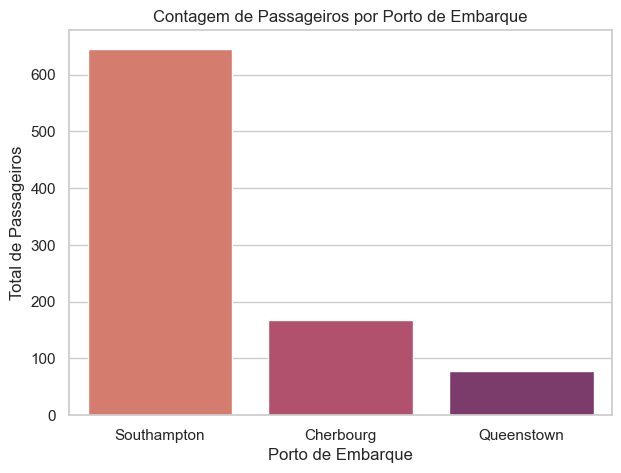

In [29]:
# Gráfico e Tabela 17: Relação Sexo por Porto de Embarque

# Tabela
gender_by_embarked = df.groupby(['Embarked', 'Sex']).size().unstack(fill_value=0)
gender_by_embarked = gender_by_embarked.rename(index={'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})
gender_by_embarked = gender_by_embarked.rename(columns={'male': 'Homens', 'female': 'Mulheres'})
gender_by_embarked['Total'] = gender_by_embarked['Homens'] + gender_by_embarked['Mulheres']
print("Gráfico e Tabela 17: Relação Sexo por Porto de Embarque")
display(gender_by_embarked)

# Grafico
plt.figure(figsize=(7, 5))
embarked_counts = df['Embarked'].value_counts()
embarked_counts_renamed = embarked_counts.rename(index={'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})
sns.barplot(x=embarked_counts_renamed.index, y=embarked_counts_renamed.values, hue=embarked_counts_renamed.index, palette='flare', legend=False)
plt.title('Contagem de Passageiros por Porto de Embarque')
plt.xlabel('Porto de Embarque')
plt.ylabel('Total de Passageiros')
plt.show()

Gráfico e Tabela 18: Relação Classe/Embarque


Survived,Não Sobrevivente,Sobrevivente,Total
Embarked,,,
Cherbourg,75,93,168
Queenstown,47,30,77
Southampton,427,219,646


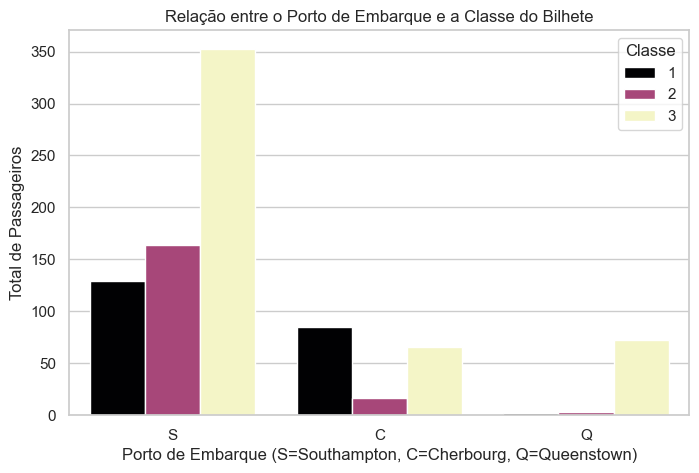

In [30]:
# Gráfico e Tabela 18: Relação Classe/Embarque

# Tabela
survival_by_embarked = df.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)
survival_by_embarked = survival_by_embarked.rename(columns={0: 'Não Sobrevivente', 1: 'Sobrevivente'})
survival_by_embarked['Total'] = survival_by_embarked['Não Sobrevivente'] + survival_by_embarked['Sobrevivente']
survival_by_embarked = survival_by_embarked.rename(index={'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})
print("Gráfico e Tabela 18: Relação Classe/Embarque")
display(survival_by_embarked)

# Grafico
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Embarked', hue='Pclass', palette='magma')
plt.title('Relação entre o Porto de Embarque e a Classe do Bilhete')
plt.xlabel('Porto de Embarque (S=Southampton, C=Cherbourg, Q=Queenstown)')
plt.ylabel('Total de Passageiros')
plt.legend(title='Classe')
plt.show()

Gráfico e Tabela 19: Relação Classe e Sobrevivência


Survived,Não Sobrevivente,Sobrevivente,Total na Classe,% Não Sobrevivente,% Sobrevivente
Pclass,,,,,
1ª Classe,80,136,216,37.04,62.96
2ª Classe,97,87,184,52.72,47.28
3ª Classe,372,119,491,75.76,24.24


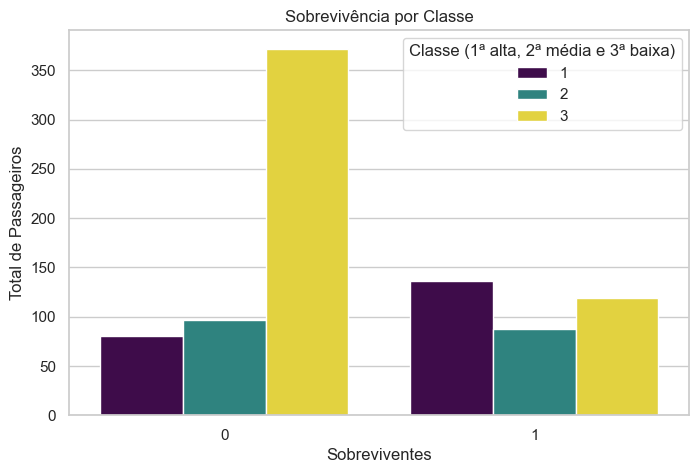

In [31]:
# Gráfico e Tabela 19: Relação Classe e Sobrevivência

# Tabela
class_survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
class_survival_counts = class_survival_counts.rename(columns={0: 'Não Sobrevivente', 1: 'Sobrevivente'})
class_survival_counts['Total na Classe'] = class_survival_counts['Não Sobrevivente'] + class_survival_counts['Sobrevivente']
class_survival_counts['% Não Sobrevivente'] = (class_survival_counts['Não Sobrevivente'] / class_survival_counts['Total na Classe'] * 100).round(2)
class_survival_counts['% Sobrevivente'] = (class_survival_counts['Sobrevivente'] / class_survival_counts['Total na Classe'] * 100).round(2)
class_survival_counts = class_survival_counts.rename(index={1: '1ª Classe', 2: '2ª Classe', 3: '3ª Classe'})
print("Gráfico e Tabela 19: Relação Classe e Sobrevivência")
display(class_survival_counts)

# Gráfico
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Survived', hue='Pclass', palette='viridis')
plt.title('Sobrevivência por Classe')
plt.xlabel('Sobreviventes')
plt.ylabel('Total de Passageiros')
plt.legend(title='Classe (1ª alta, 2ª média e 3ª baixa)')
plt.show()

Gráfico e Tabela 20: Relação Classe por Idade e Sexo


Pclass                           1ª Classe  2ª Classe  3ª Classe  Total
AgeGroup               Sex                                             
Bebês (0-4)            Mulheres          1          2          9     12
                       Homens            1          8          9     18
Crianças (5-12)        Mulheres          0          6         14     20
                       Homens            2          1         15     18
Adolescentes (13-18)   Mulheres          7          4         12     23
                       Homens            1          2         19     22
Jovens Adultos (19-30) Mulheres         31         31         83    145
                       Homens           42         45        216    303
Adultos (31-60)        Mulheres         52         33         25    110
                       Homens           62         48         84    194
Idosos (>60)           Mulheres          3          0          1      4
                       Homens           13          4          4     21

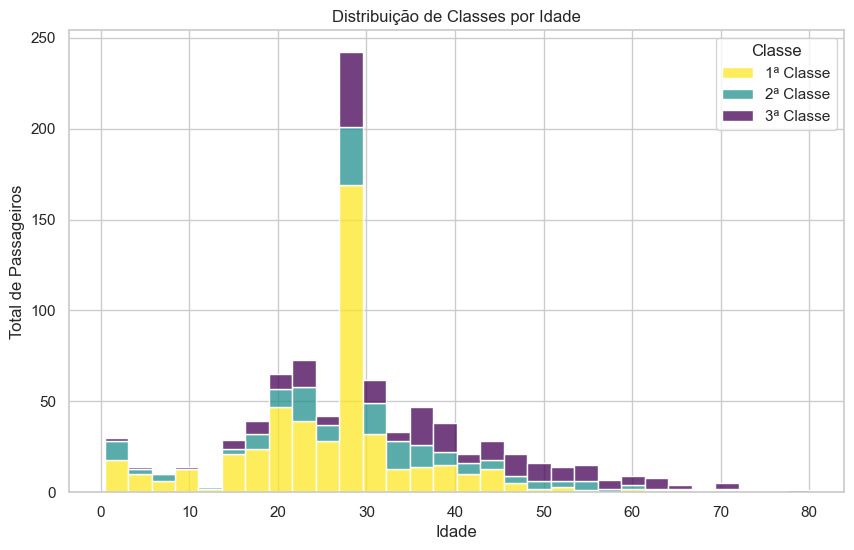

In [32]:
# Gráfico e Tabela 20: Relação Classe por Idade e Sexo

# Tabela:
class_by_age_sex = df.groupby(['AgeGroup', 'Sex', 'Pclass'], observed=False).size().unstack(fill_value=0)
class_by_age_sex = class_by_age_sex.rename(columns={1: '1ª Classe', 2: '2ª Classe', 3: '3ª Classe'})
class_by_age_sex['Total'] = class_by_age_sex['1ª Classe'] + class_by_age_sex['2ª Classe'] + class_by_age_sex['3ª Classe']
class_by_age_sex_renamed = class_by_age_sex.rename(index={'male': 'Homens', 'female': 'Mulheres'}, level='Sex')
print("Gráfico e Tabela 20: Relação Classe por Idade e Sexo")
display(class_by_age_sex_renamed)

# Gráfico:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Pclass', multiple='stack', bins=30, palette='viridis', kde=False)
plt.title('Distribuição de Classes por Idade')
plt.xlabel('Idade')
plt.ylabel('Total de Passageiros')
plt.legend(title='Classe', labels=['1ª Classe', '2ª Classe', '3ª Classe'])
plt.show()

In [34]:
print('Insights')

print('1 - O grupo demográfico com a menor taxa de sobrevivência é de longe, o dos homens adultos da 3ª classe.')
print('2 - Mulheres tiveram uma probabilidade de sobrevivência drasticamente maior do que os homens, quando aplicamos a váriavel de classes percebemos que mulheres da 3ª classe tiveram taxas de sobrevivência piores do que as mulheres da 1ª e 2ª classes, mas melhores ou iguais às dos homens da 1ª classe.')
print('3 - Crianças pequenas (> 10 anos) apresentam taxas de sobrevivência mais elevadas em todas as classes, especialmente na 1ª e 2ª classes.')
print('4 - Ao analisar a sobrevivência por classe, fica claro que os passageiros da 1ª classe tiveram uma taxa de sobrevivência significativamente superior aos da 3ª classe, assim como o agrupamento feito pelos preços dos bilhetes apontam que passageiros que pagaram tarifas mais altas (geralmente associadas à 1ª classe) sobreviveram em maior proporção.')
print('5 - Passageiros no grupo de convés mais alto (identificados com iniciais A - E) tiveram maiores probabilidade de sobrevivência e estão relacionados com classes e valores de tickets mais altos.')

Insights
1 - O grupo demográfico com a menor taxa de sobrevivência é de longe, o dos homens adultos da 3ª classe.
2 - Mulheres tiveram uma probabilidade de sobrevivência drasticamente maior do que os homens, quando aplicamos a váriavel de classes percebemos que mulheres da 3ª classe tiveram taxas de sobrevivência piores do que as mulheres da 1ª e 2ª classes, mas melhores ou iguais às dos homens da 1ª classe.
3 - Crianças pequenas (> 10 anos) apresentam taxas de sobrevivência mais elevadas em todas as classes, especialmente na 1ª e 2ª classes.
4 - Ao analisar a sobrevivência por classe, fica claro que os passageiros da 1ª classe tiveram uma taxa de sobrevivência significativamente superior aos da 3ª classe, assim como o agrupamento feito pelos preços dos bilhetes apontam que passageiros que pagaram tarifas mais altas (geralmente associadas à 1ª classe) sobreviveram em maior proporção.
5 - Passageiros no grupo de convés mais alto (identificados com iniciais A - E) tiveram maiores probabi